# Regression with Machine Learning

# Importing Libraries

In [63]:
from Packages import *
import statsmodels.api as sm

# Importing the dataset

In [42]:
df = pd.read_csv('University_adm_data.csv')
df.head()

,Serial No.,Gender,GRE Score,TOEFL Score,University Rating,LOR,SOP,CGPA,Research,Chance of Admit
0,1,Male,337,118,4,4.5,4.5,9.65,1,0.92
1,2,Female,324,107,4,4.5,4.0,8.87,1,0.76
2,3,Female,316,104,3,3.5,3.0,8.00,1,0.72
3,4,Female,322,110,3,2.5,3.5,8.67,1,0.80
4,5,Female,314,103,2,3.0,2.0,8.21,0,0.65


In [43]:
df.drop(['Serial No.'], axis=1, inplace=True)
df.head()

,Gender,GRE Score,TOEFL Score,University Rating,LOR,SOP,CGPA,Research,Chance of Admit
0,Male,337,118,4,4.5,4.5,9.65,1,0.92
1,Female,324,107,4,4.5,4.0,8.87,1,0.76
2,Female,316,104,3,3.5,3.0,8.00,1,0.72
3,Female,322,110,3,2.5,3.5,8.67,1,0.80
4,Female,314,103,2,3.0,2.0,8.21,0,0.65


# Declare the dependent and independent variables

In [44]:
x = df[['GRE Score','TOEFL Score','University Rating','LOR','SOP']]
y = df['Chance of Admit']
x

,GRE Score,TOEFL Score,University Rating,LOR,SOP
0,337,118,4,4.5,4.5
1,324,107,4,4.5,4.0
2,316,104,3,3.5,3.0
3,322,110,3,2.5,3.5
4,314,103,2,3.0,2.0
...,...,...,...,...,...
395,324,110,3,3.5,3.5
396,325,107,3,3.5,3.0
397,330,116,4,4.5,5.0
398,312,103,3,4.0,3.5


# Taking care of missing data

In [45]:
df.isnull().sum()

Gender               0
GRE Score            0
TOEFL Score          0
University Rating    0
LOR                  0
SOP                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Encoding categorical data

In [46]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [47]:
df.head()

,Gender,GRE Score,TOEFL Score,University Rating,LOR,SOP,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,0,324,107,4,4.5,4.0,8.87,1,0.76
2,0,316,104,3,3.5,3.0,8.00,1,0.72
3,0,322,110,3,2.5,3.5,8.67,1,0.80
4,0,314,103,2,3.0,2.0,8.21,0,0.65


# Spliting the dataset into the Training set and Test set

In [48]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=1)

# Feature Scaling

In [49]:
ss = StandardScaler()

In [50]:
x_train[['GRE Score','TOEFL Score','University Rating','LOR','SOP']] = \
ss.fit_transform(x_train[['GRE Score','TOEFL Score','University Rating','LOR','SOP']])

x_test[['GRE Score','TOEFL Score','University Rating','LOR','SOP']] = \
ss.transform(x_test[['GRE Score','TOEFL Score','University Rating','LOR','SOP']])

In [64]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

results = sm.OLS(y_train,x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     185.6
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           1.72e-91
Time:                        12:08:45   Log-Likelihood:                 395.41
No. Observations:                 320   AIC:                            -778.8
Df Residuals:                     314   BIC:                            -756.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7261      0.004    182.961      0.000       0.718       0.734
GRE Score             0.0499      0.007      6.807      0.000       0.035       0.064
TOEFL Score           0.0358      0.008      4.590      0.000       0.020       0.051
University Rating     0.0207      0.007      2.910      0.004       0.007       0.035
LOR                   0.0298      0.006      4.940      0.000       0.018       0.042
SOP                   0.0029      0.007      0.419      0.676      -0.011       0.017
==============================================================================
Omnibus:                       72.907   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.777
Skew:                          -1.157   Prob(JB):                     4.05e-34
Kurtosis:                       5.487   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Development (Training the Multiple Linear Regression)

In [52]:
import statsmodels.api as sm

In [53]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

results = sm.OLS(y_train,x_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     185.6
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           1.72e-91
Time:                        10:16:42   Log-Likelihood:                 395.41
No. Observations:                 320   AIC:                            -778.8
Df Residuals:                     314   BIC:                            -756.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7261      0.004    182.961      0.000       0.718       0.734
GRE Score             0.0499      0.007      6.807      0.000       0.035       0.064
TOEFL Score           0.0358      0.008      4.590      0.000       0.020       0.051
University Rating     0.0207      0.007      2.910      0.004       0.007       0.035
LOR                   0.0298      0.006      4.940      0.000       0.018       0.042
SOP                   0.0029      0.007      0.419      0.676      -0.011       0.017
==============================================================================
Omnibus:                       72.907   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.777
Skew:                          -1.157   Prob(JB):                     4.05e-34
Kurtosis:                       5.487   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Predicting the Test set results

In [54]:
y_pred = results.predict(x_test)
y_pred

398    0.696746
125    0.589050
328    0.805117
339    0.808796
172    0.834051
         ...   
347    0.444901
41     0.655810
180    0.616806
132    0.714574
224    0.592352
Length: 80, dtype: float64

In [55]:
y_test

398    0.67
125    0.64
328    0.80
339    0.81
172    0.86
       ... 
347    0.42
41     0.49
180    0.71
132    0.71
224    0.67
Name: Chance of Admit, Length: 80, dtype: float64

In [56]:
y_pred = y_pred.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Calculating Evaluation Metrics

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
mse =  mean_squared_error(y_test,y_pred)
mse

0.00562430321530501

# Correlation

In [59]:
df[['LOR', 'Chance of Admit']].corr()

,LOR,Chance of Admit
LOR,1.000000,0.669889
Chance of Admit,0.669889,1.000000


<h3>GRE Score vs Chance of Admit</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'GRE Score' and 'Chance of Admit':

In [60]:
from scipy import stats

In [61]:
per_coef, p_value = stats.pearsonr(df['GRE Score'], df['Chance of Admit'])

print(per_coef)
print(p_value)

0.8026104595903504
2.458112414178991e-91


# Regression Plot

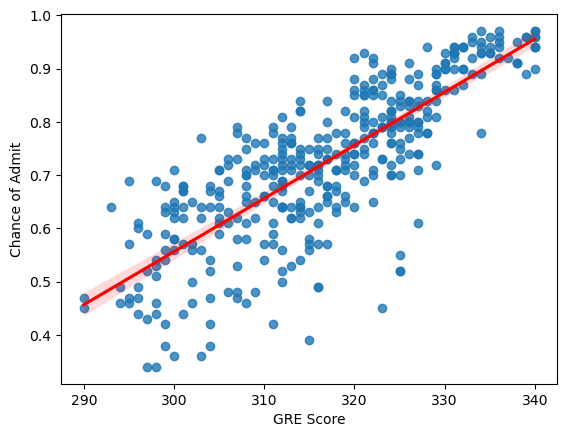

In [62]:
sns.regplot(x="GRE Score",y='Chance of Admit', data=df, line_kws={'color':'red'})
plt.show()

# Residual Plot

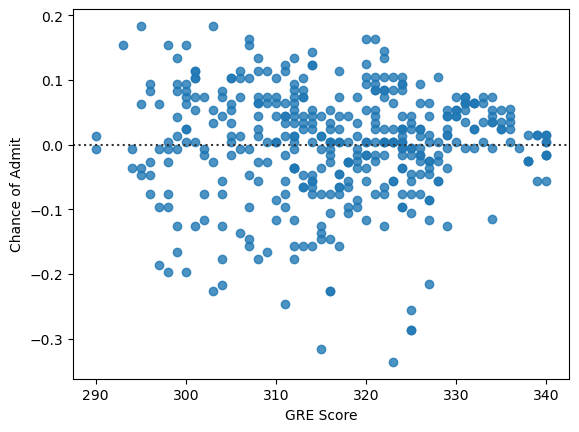

In [38]:
sns.residplot(x=df['GRE Score'], y=df['Chance of Admit'])
plt.show()

### Randomly spread out arround the x-axis indicates a LINEAR MODEL is approperiate for the data.